Saving Airfares_simple_garbled2.csv to Airfares_simple_garbled2 (2).csv


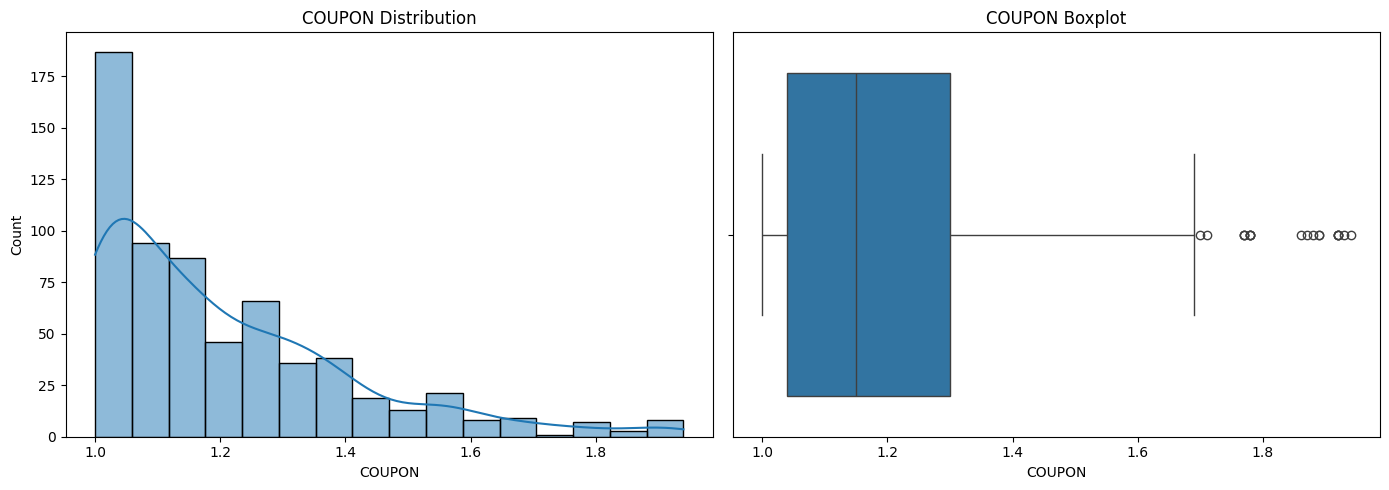

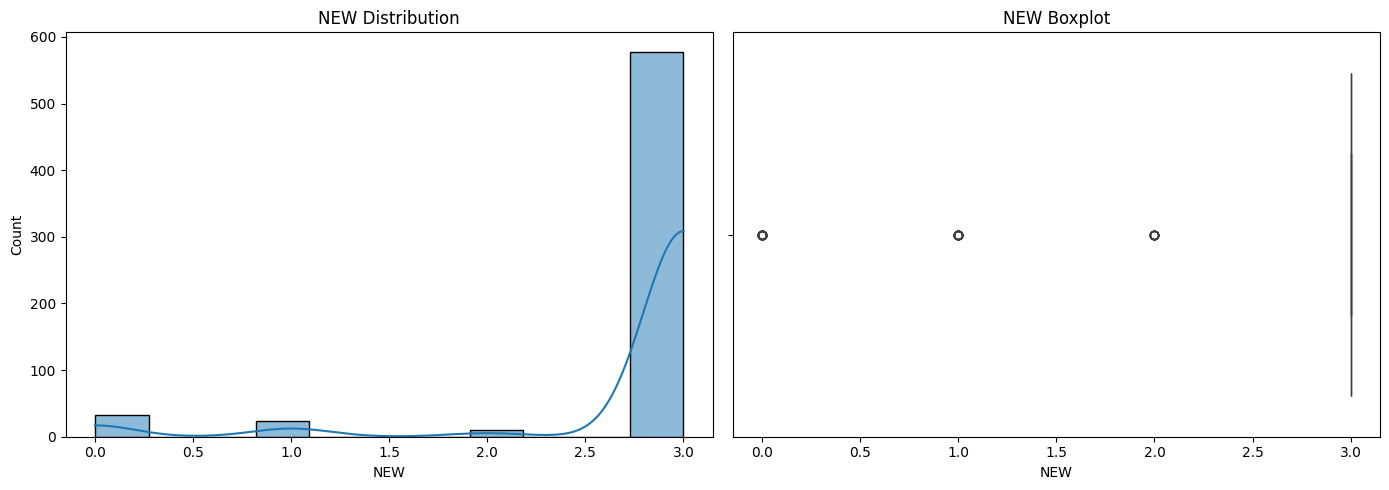

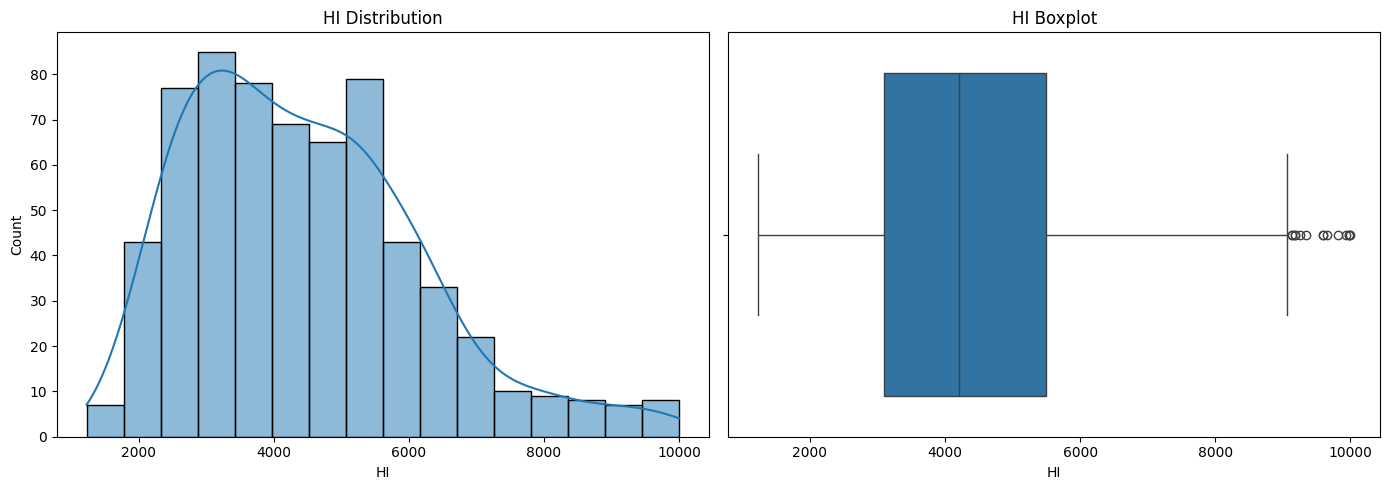

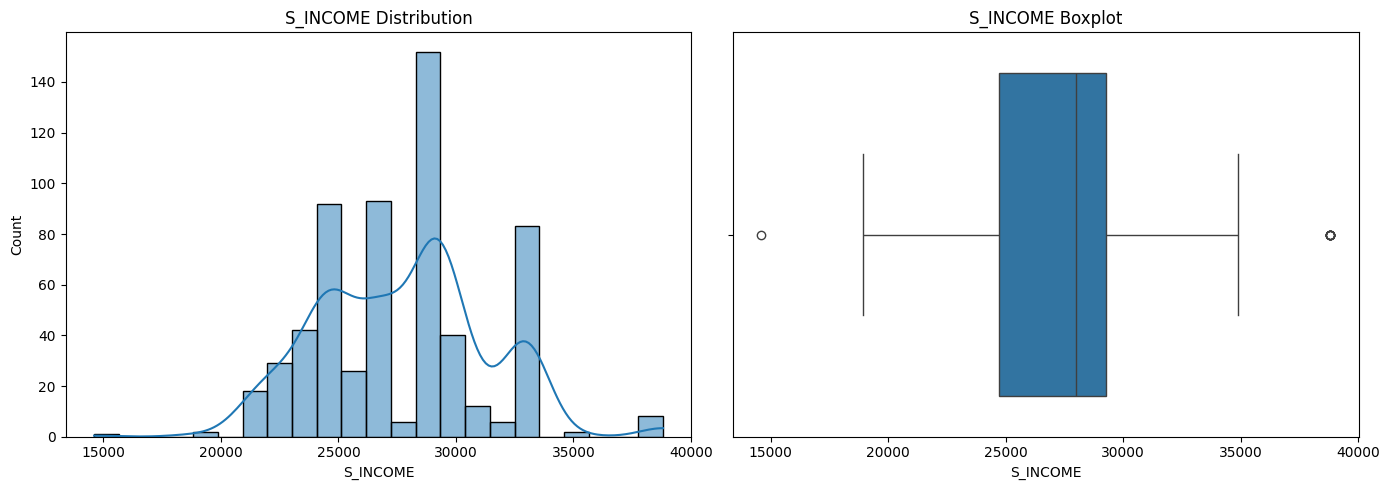

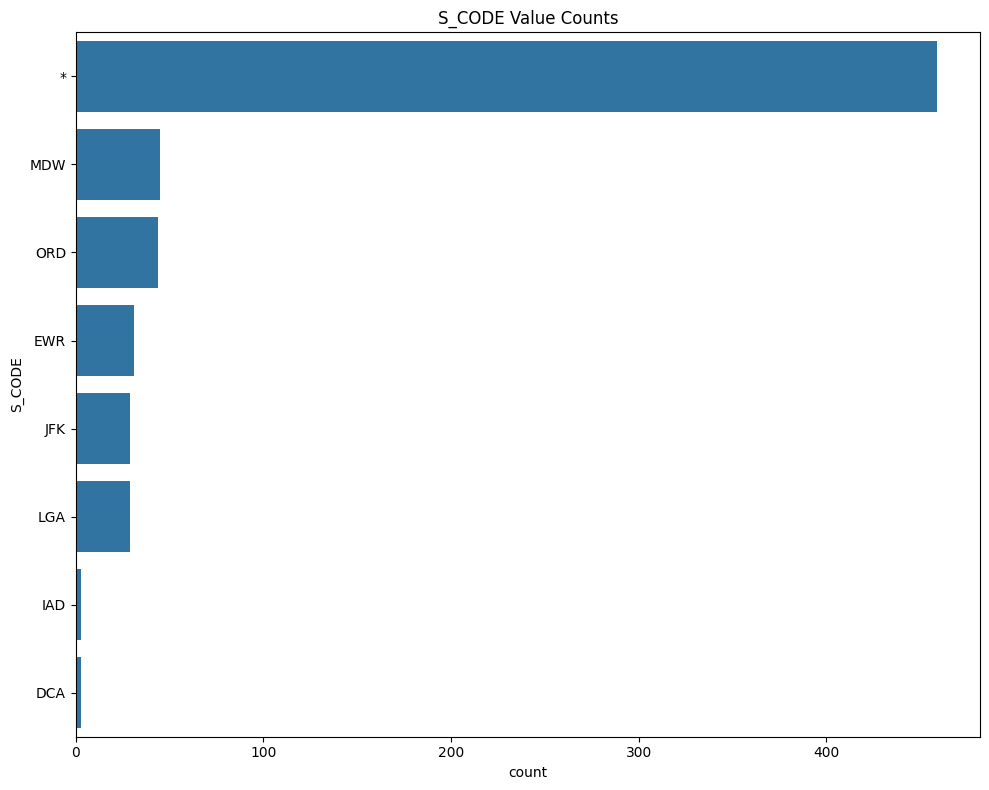

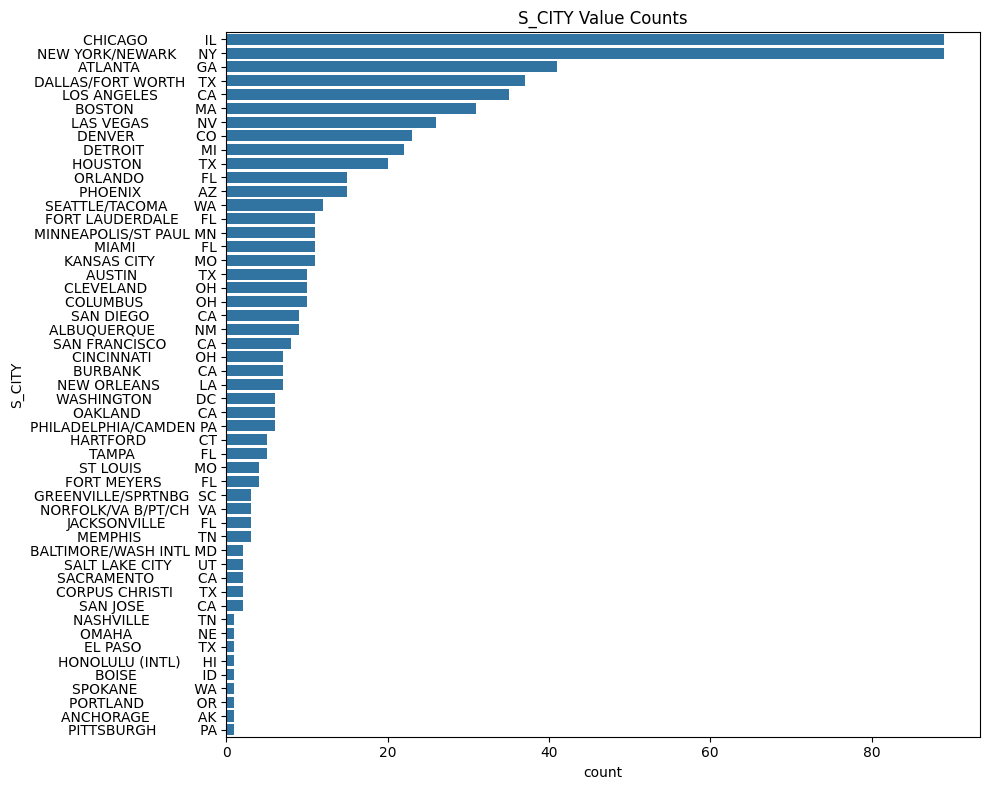

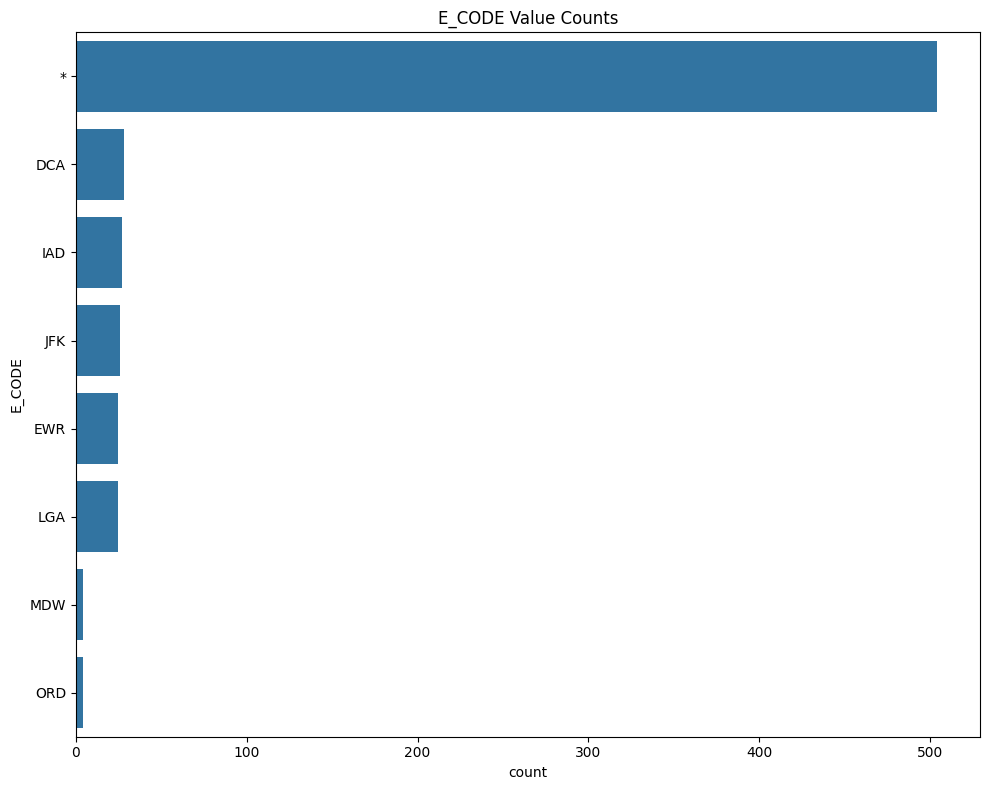

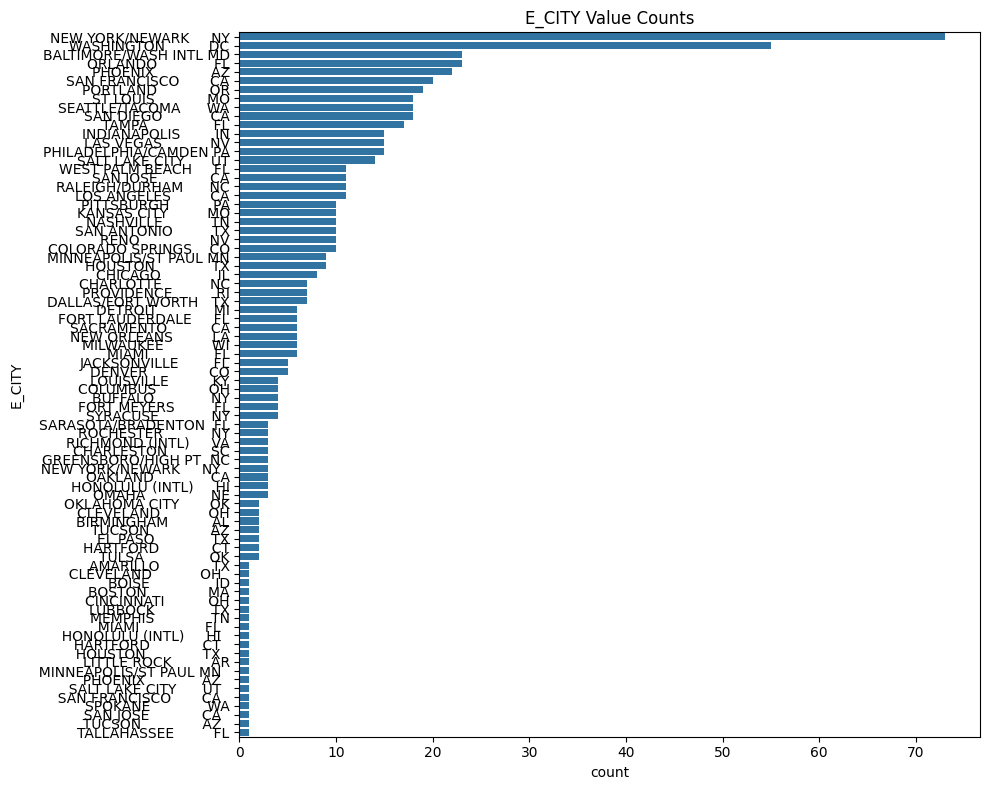

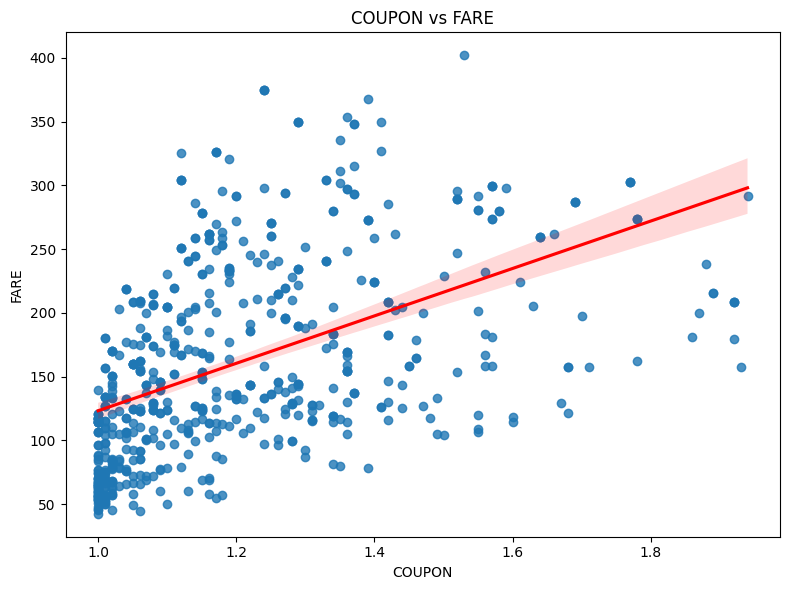

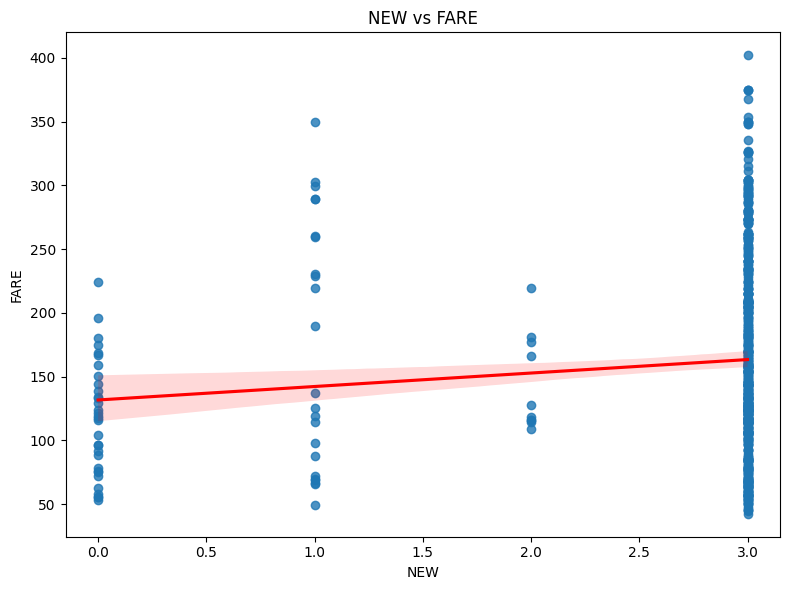

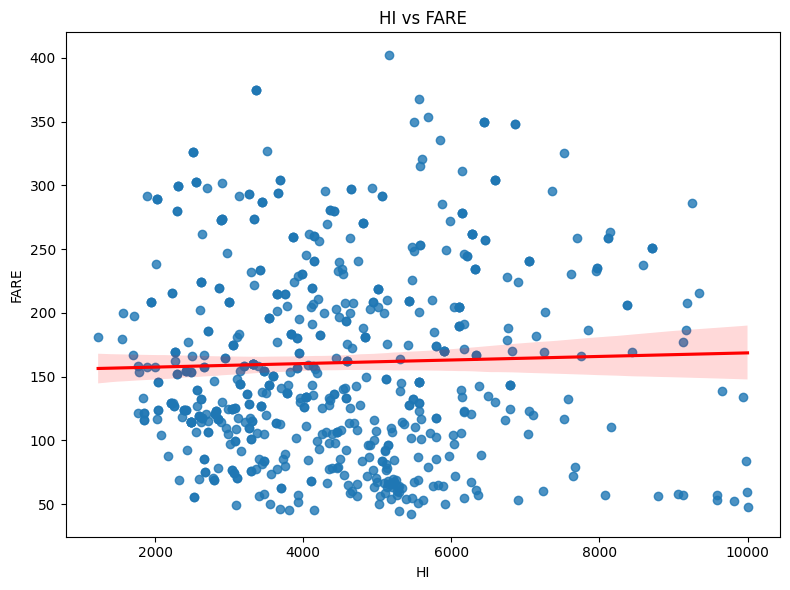

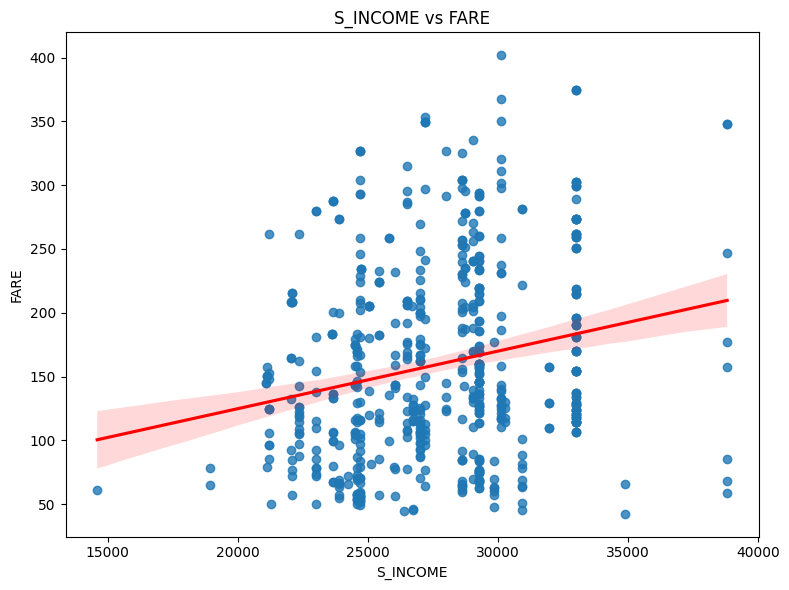

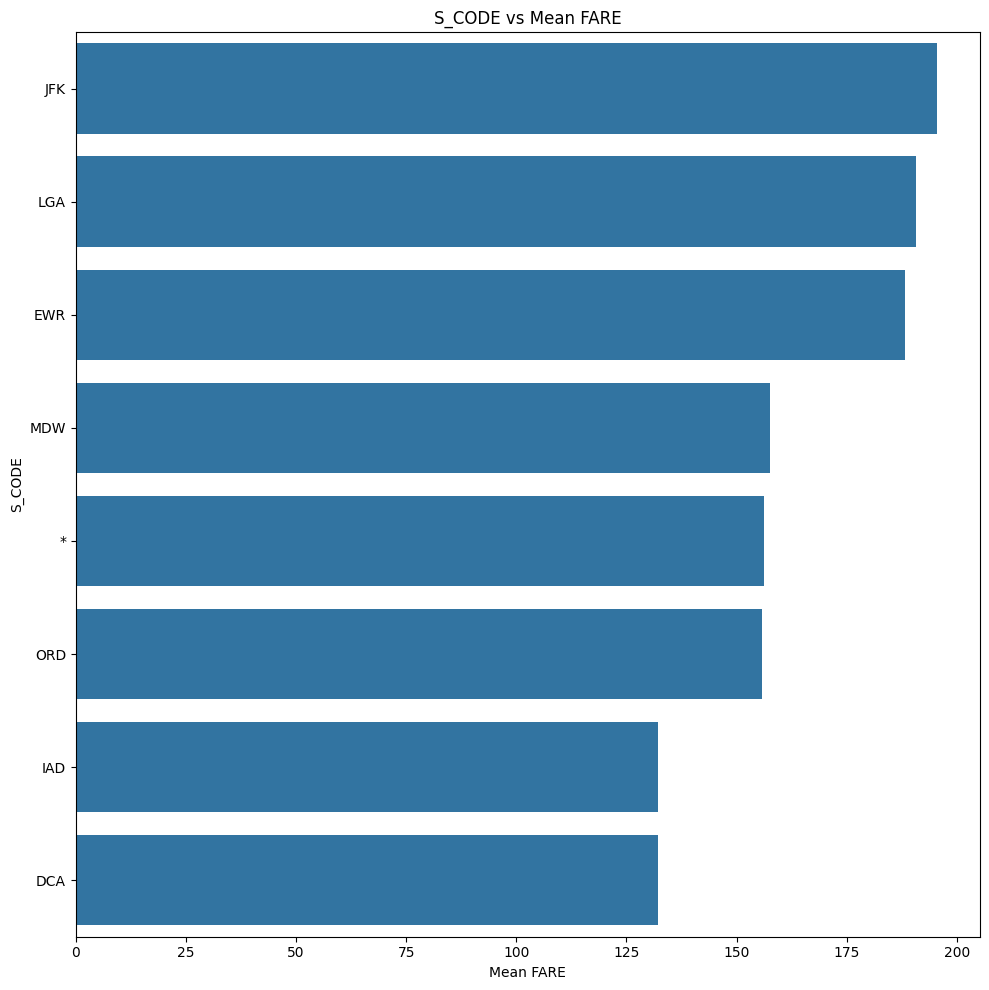

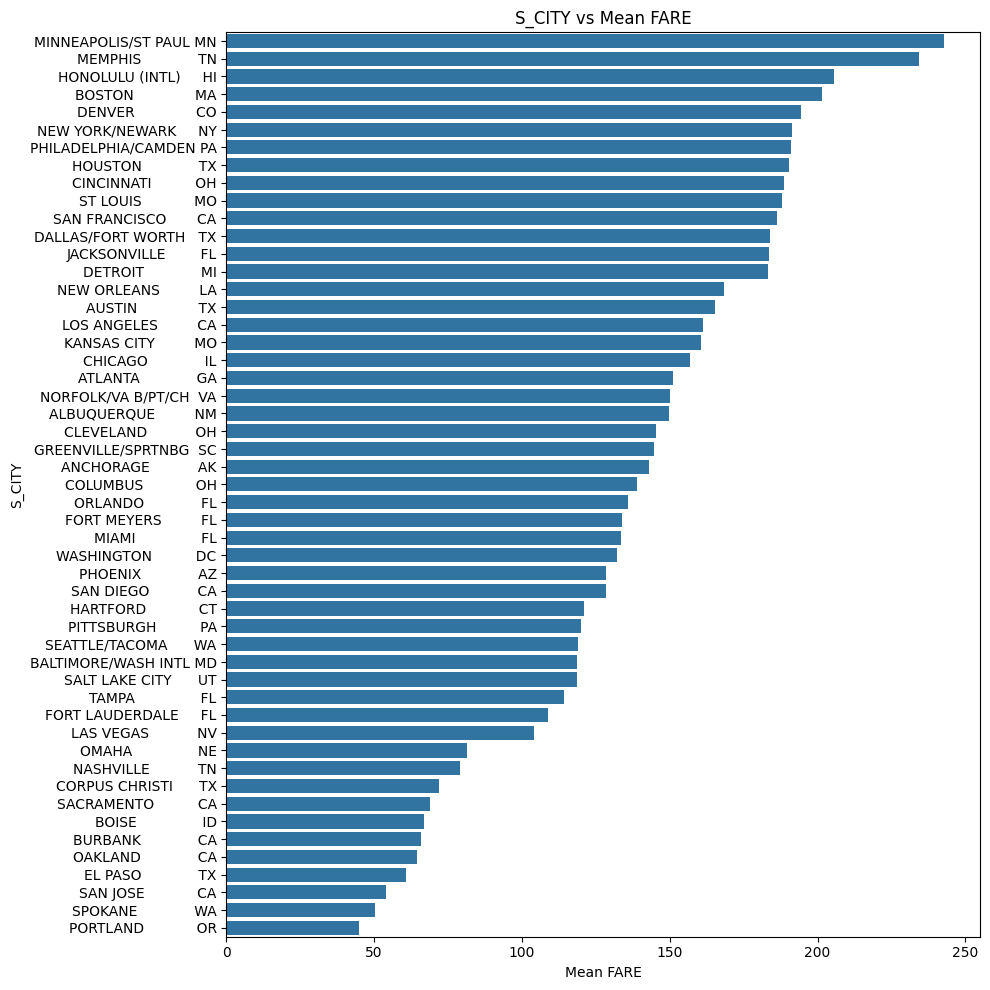

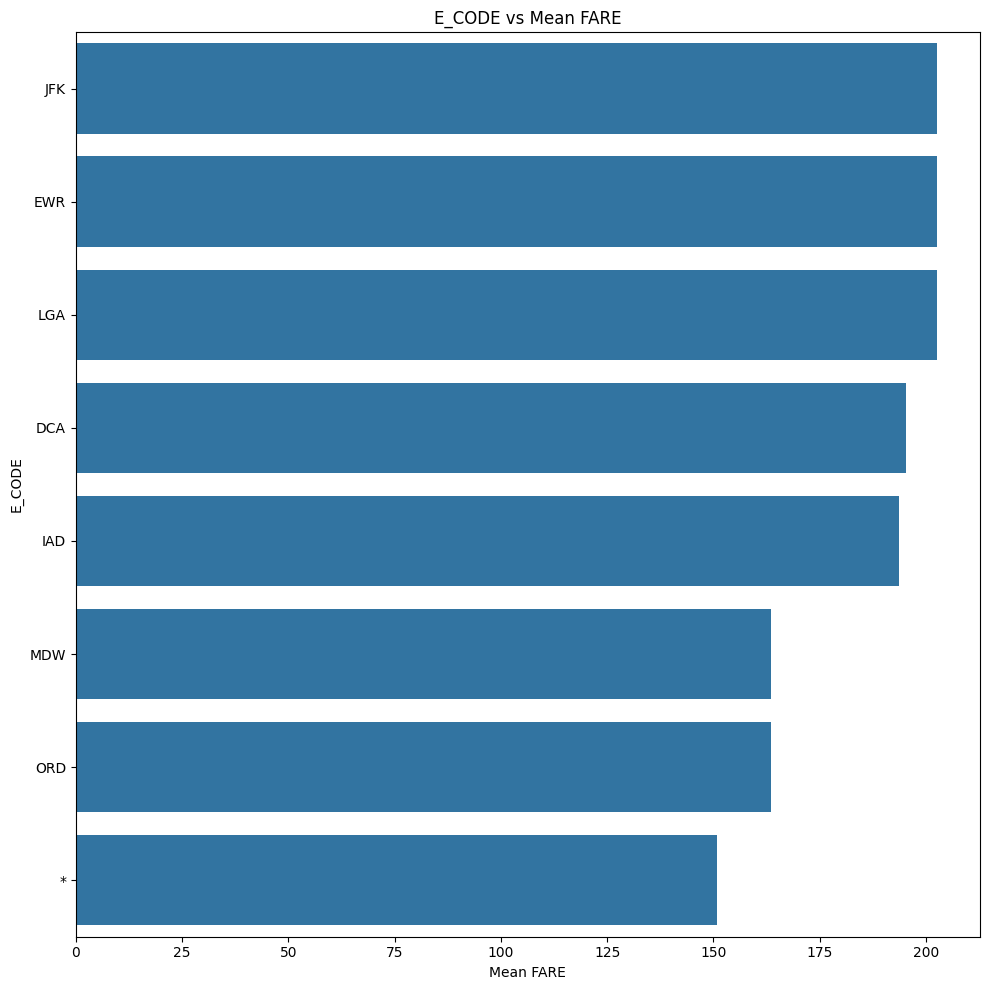

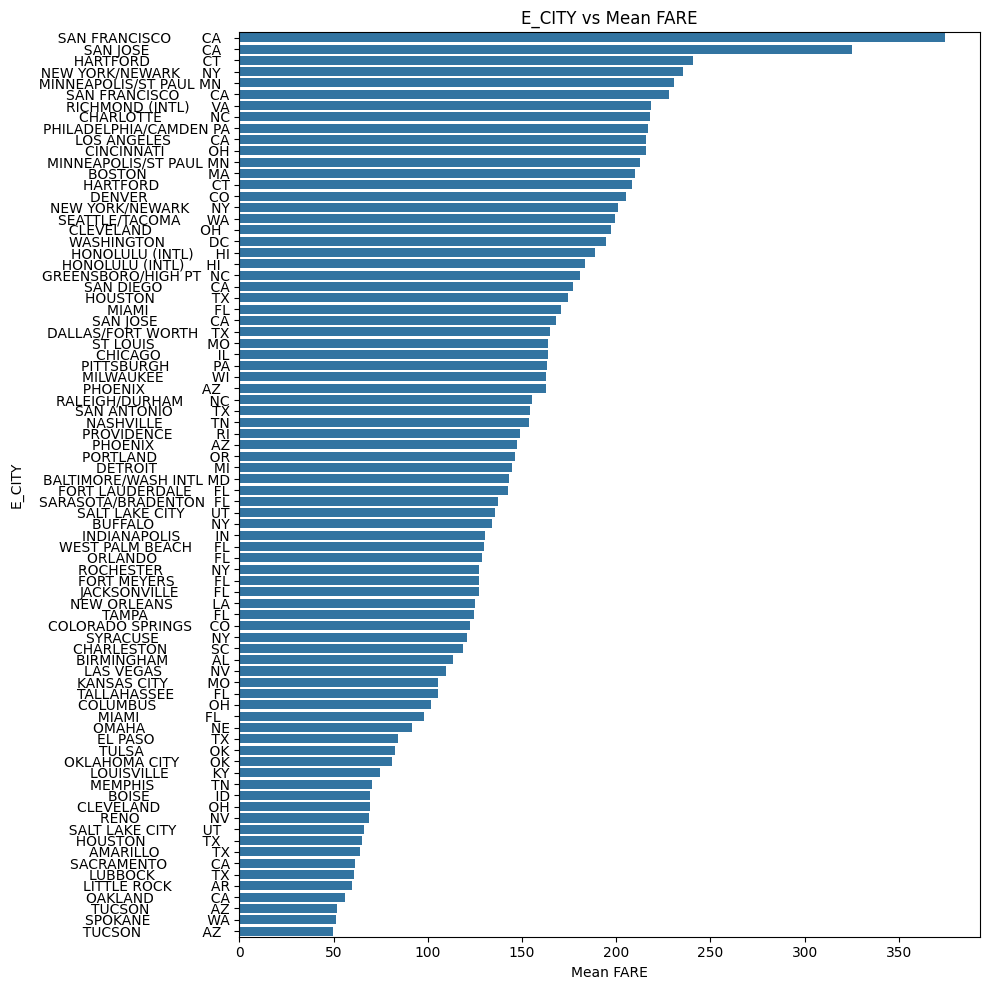

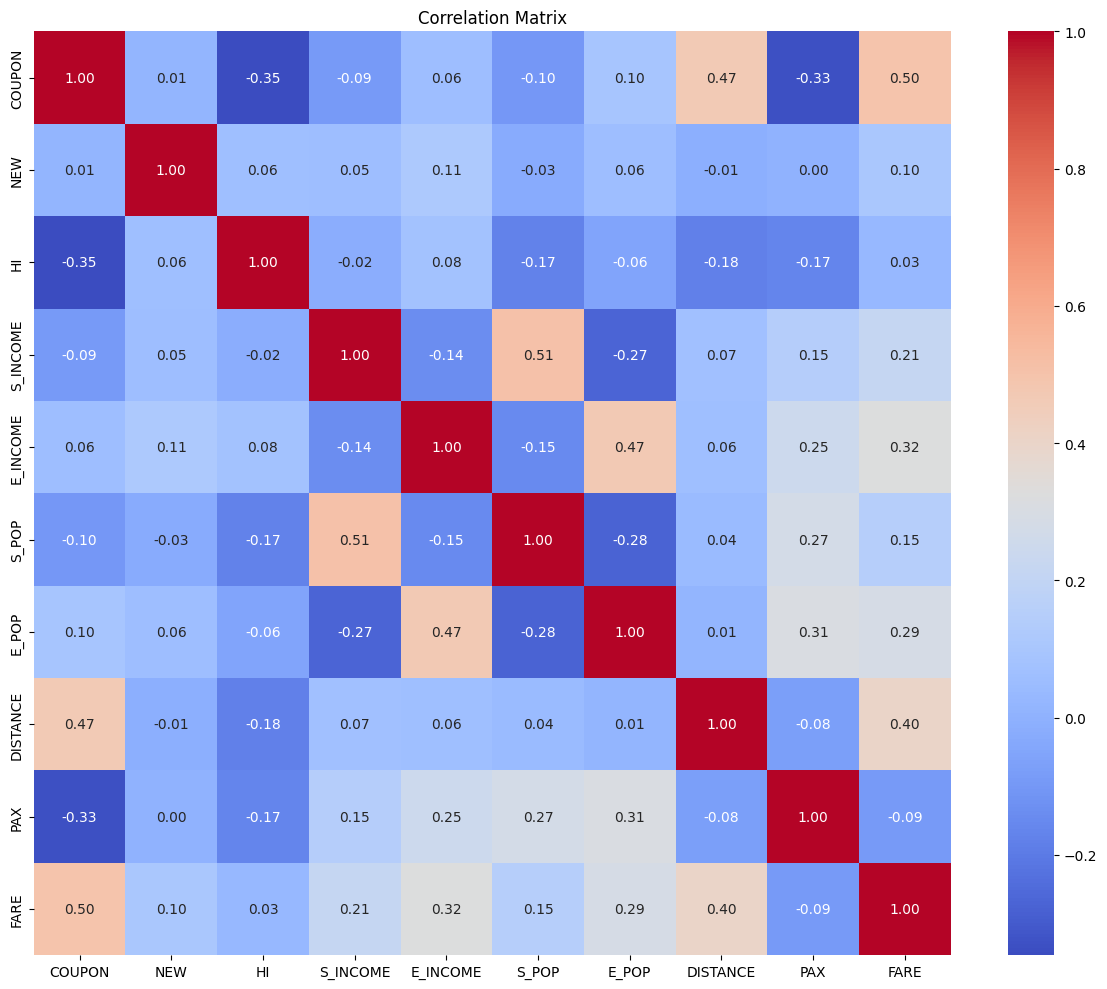

✅ 전처리된 전체 데이터셋 샘플:
     COUPON  NEW        HI  S_INCOME  E_INCOME     S_POP     E_POP  DISTANCE  \
0 -1.045211  0.0  0.505544  0.268623 -1.427718 -0.508127 -1.093425 -1.038802   
1 -0.729445  0.0  0.580346 -0.217694  0.509251 -0.343728  1.443856 -0.629929   
2 -0.729445  0.0  2.754864  0.078415  0.509251  0.403681  1.443856 -0.958267   
3 -0.729445  0.0 -1.044176  0.452915  0.509251  1.080946  1.443856 -0.574174   
4 -0.729445  0.0 -1.044176  0.452915  0.509251  1.080946  1.443856 -0.574174   

        PAX  S_CODE_DCA  ...  E_CITY_nan  VACATION_YES  VACATION_nan  SW_YES  \
0 -0.391859         0.0  ...         0.0           0.0           0.0     1.0   
1 -0.252551         0.0  ...         0.0           0.0           0.0     0.0   
2 -0.597615         0.0  ...         0.0           0.0           0.0     0.0   
3  2.126182         0.0  ...         0.0           0.0           0.0     1.0   
4  2.126182         0.0  ...         0.0           0.0           0.0     1.0   

   SW_nan  SLOT_FRE

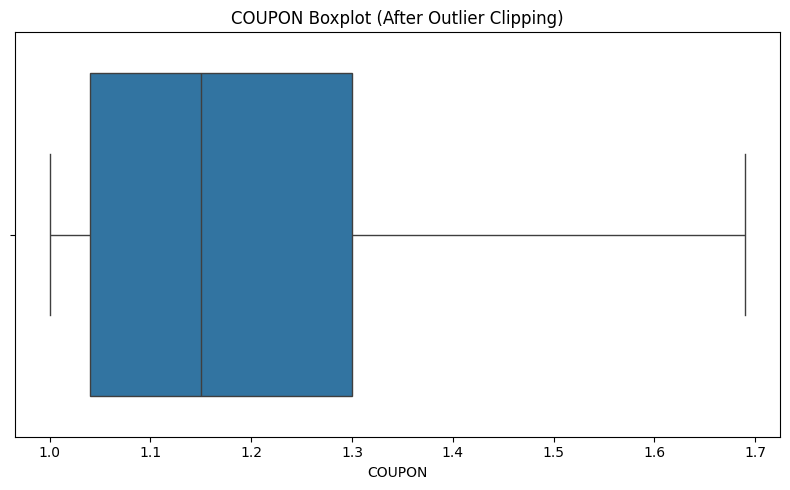

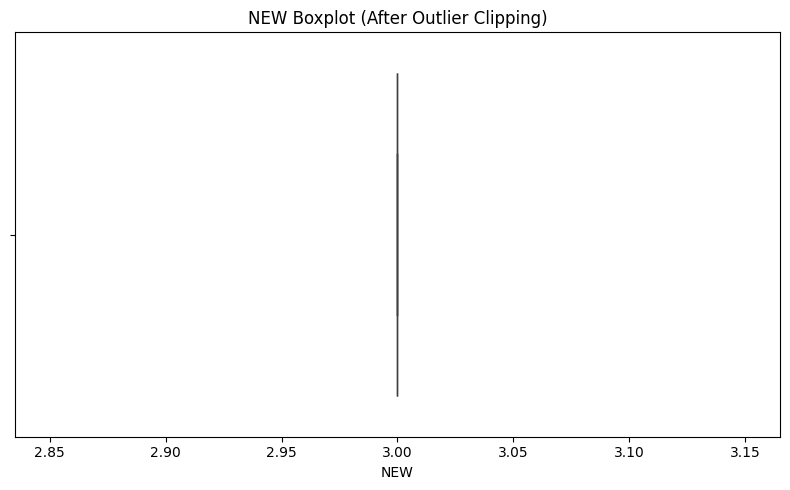

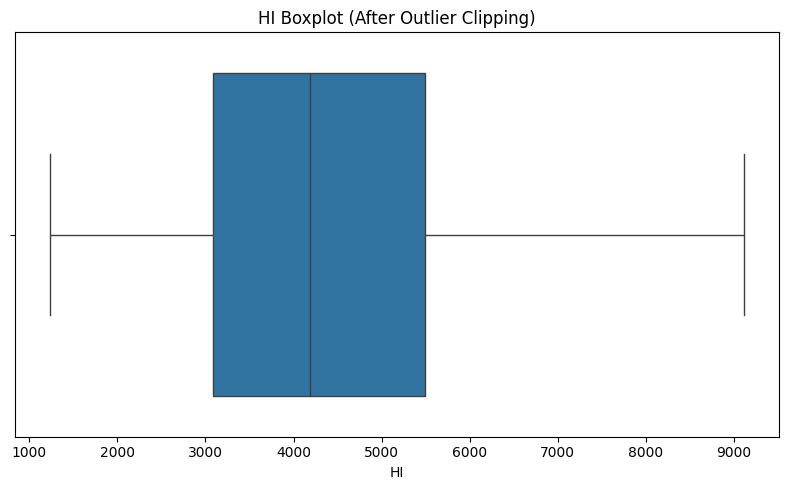

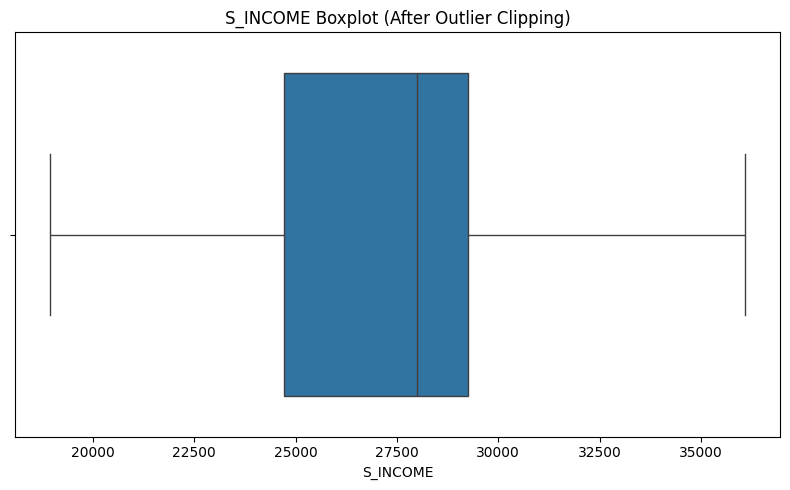

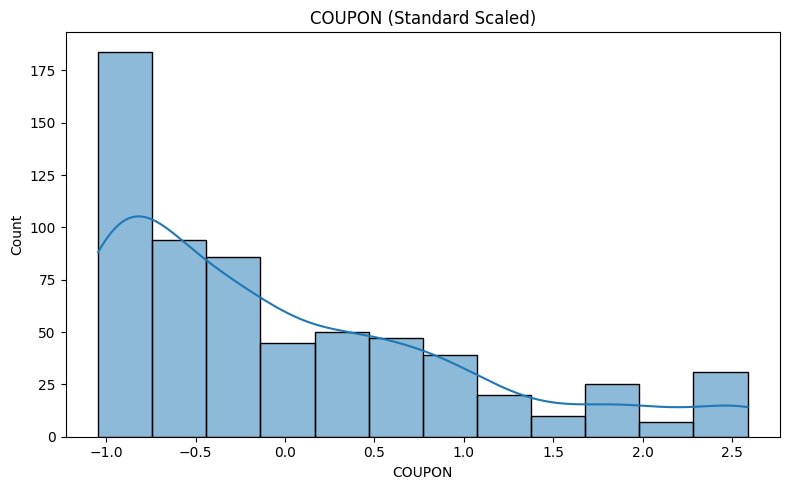

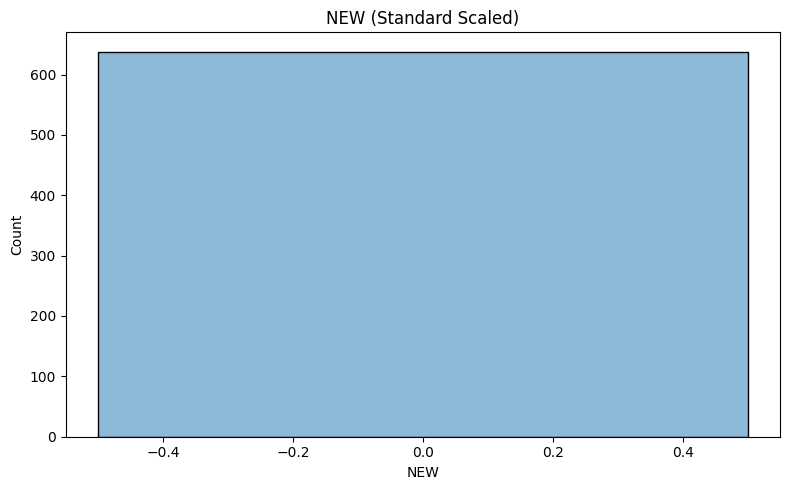

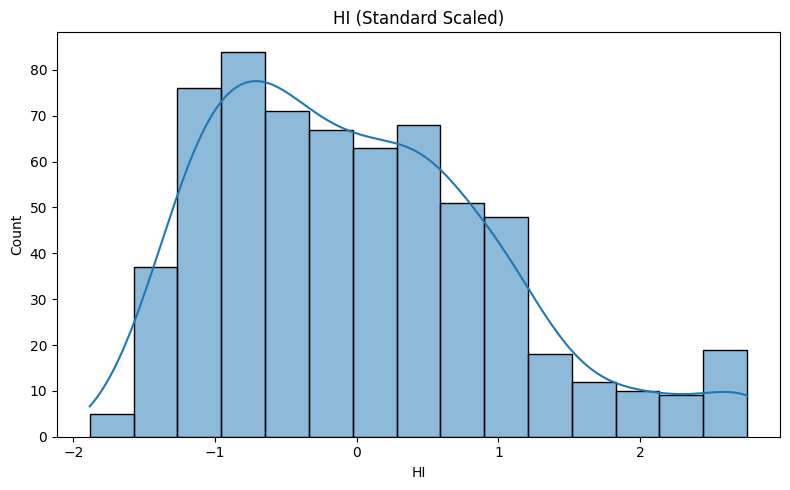

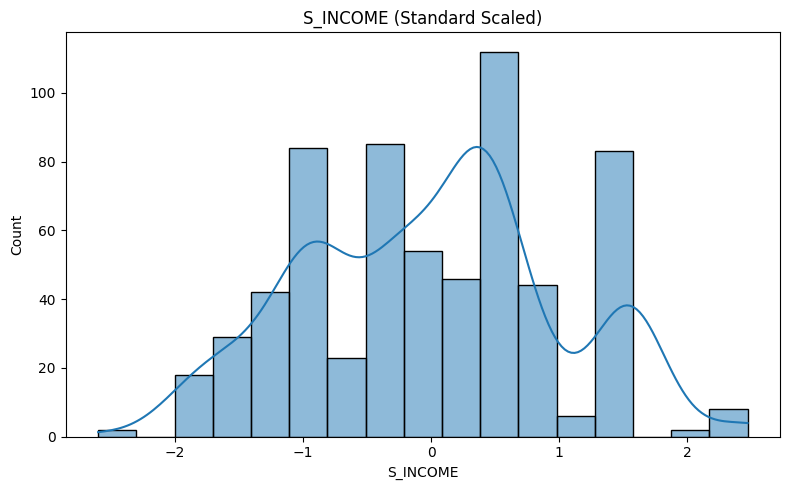

📌 변수 수 요약
1️⃣ 원래 수치형 변수 수: 9
2️⃣ 범주형 변수 고유값 총합 (인코딩 전 기준): 154
3️⃣ 범주형 변수 인코딩 후 컬럼 수 (drop='first' 적용): 154
✅ 최종 feature 수 (스케일링된 수치형 + 인코딩된 범주형): 163


In [3]:
# ✅ Phase 2.1 ~ 2.2 - 변수 유형 분리 및 시각화, 변수 간 관계 분석


# ✅ 1. 필수 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# ✅ 2. Colab에서 파일 업로드
# 사용자로부터 CSV 파일을 업로드받음
from google.colab import files
uploaded = files.upload()

# ✅ 3. 업로드된 파일을 Pandas로 로드
# 파일 이름 추출 후, 데이터프레임으로 읽기
import io
filename = list(uploaded.keys())[0]
df2 = pd.read_csv(io.BytesIO(uploaded[filename]))

# ✅ 4. 변수 분리 및 초기 설정
TARGET_COLUMN = 'FARE'  # 예측 목표 변수
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()  # 수치형 변수 자동 추출
categorical_cols = df2.select_dtypes(include='object').columns.tolist()  # 범주형 변수 자동 추출
numeric_cols.remove(TARGET_COLUMN)  # 타겟 변수는 제외

# ✅ 범주형 변수 대소문자 통일 (데이터 정규화 목적)
for col in categorical_cols:
    df2[col] = df2[col].astype(str).str.upper()

# ✅ FARE 음수 제거 (현실적으로 존재 불가능한 요금 제거)
df2 = df2[df2['FARE'] >= 0]

# ✅ 대표 수치형 변수 분포 시각화 (처음 4개)
# 히스토그램 + KDE로 분포 확인 / 박스플롯으로 이상치 확인
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.histplot(df2[col], kde=True, ax=axes[0])
    axes[0].set_title(f'{col} Distribution')  # 분포 확인용
    sns.boxplot(x=df2[col], ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')  # 이상치 확인용
    plt.tight_layout()
    plt.show()

# ✅ 대표 범주형 변수 빈도수 시각화 (처음 4개, 가로 막대)
# 각 범주형 변수의 값 분포를 파악하여 데이터 불균형 여부 확인
sample_categorical = categorical_cols[:4]
for col in sample_categorical:
    plt.figure(figsize=(10, 8))
    order = df2[col].value_counts().index  # 값 많은 순서대로 정렬
    sns.countplot(data=df2, y=col, order=order)
    plt.title(f'{col} Value Counts')  # 범주 빈도 시각화
    plt.tight_layout()
    plt.show()

# ✅ 수치형 변수 vs 타겟 변수 관계 시각화 (산점도 + 회귀선)
# 회귀선을 통해 선형적 관계 여부를 시각적으로 확인
for col in sample_numeric:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=df2[col], y=df2[TARGET_COLUMN], line_kws={"color": "red"})
    plt.title(f'{col} vs {TARGET_COLUMN}')
    plt.tight_layout()
    plt.show()

# ✅ 범주형 변수별 타겟 평균 시각화 (바 차트)
# 각 범주에 따라 요금 평균이 어떻게 달라지는지 시각화
for col in sample_categorical:
    plt.figure(figsize=(10, 10))
    category_means = df2.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
    sns.barplot(y=category_means.index, x=category_means.values)
    plt.title(f'{col} vs Mean {TARGET_COLUMN}')  # 평균 요금 비교
    plt.xlabel(f'Mean {TARGET_COLUMN}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# ✅ 상관관계 히트맵
# 수치형 변수들 간의 상관관계를 한 눈에 시각적으로 확인
plt.figure(figsize=(12, 10))
corr_matrix = df2[numeric_cols + [TARGET_COLUMN]].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")  # 변수 간 상관관계 분석
plt.tight_layout()
plt.show()



# ✅ Phase 2.3 - 데이터 전처리 및 데이터셋 적용



from sklearn.impute import SimpleImputer  # 결측치 대체
from sklearn.preprocessing import OneHotEncoder, StandardScaler # 인코딩 및 스케일링

# 수치형/범주형 변수 구분
numeric_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df2.select_dtypes(include='object').columns.tolist()
numeric_cols.remove(TARGET_COLUMN) # 타겟 변수는 수치형이지만 제외


# 5. 결측치 처리
# 수치형 변수는 중앙값(median), 범주형 변수는 최빈값(most frequent)으로 채움
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# 각각 처리 후 다시 DataFrame으로 변환 (컬럼명 유지)
df2[numeric_cols] = pd.DataFrame(num_imputer.fit_transform(df2[numeric_cols]), columns=numeric_cols)
df2[categorical_cols] = pd.DataFrame(cat_imputer.fit_transform(df2[categorical_cols]), columns=categorical_cols)


# ✅ 이상치 처리 함수 정의 (IQR 방식)
# 이상치를 Q1 - 1.5*IQR 이하 또는 Q3 + 1.5*IQR 이상으로 간주하여 clip 처리
# 너무 큰 이상값이 모델에 왜곡을 줄 경우 완화할 수 있음
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[column].clip(lower=lower, upper=upper)

# 모든 수치형 변수에 이상치 클리핑 적용
for col in numeric_cols:
    df2[col] = clip_outliers_iqr(df2, col)

# ✅ 범주형 변수 인코딩: One-Hot 인코딩 (첫 번째 범주 제외 → 다중공선성 방지)

# handle_unknown='ignore': 테스트셋에 학습 시 존재하지 않았던 범주가 들어와도 오류 없이 처리
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# 범주형 변수(categorical_cols)에 대해 인코딩을 수행
encoded = encoder.fit_transform(df2[categorical_cols])  # 결과는 numpy 배열 형태

# 인코딩된 결과의 컬럼명을 추출 (예: 'CITY_NEW_YORK', 'AIRLINE_DELTA' 등)
encoded_cols = encoder.get_feature_names_out(categorical_cols)

# numpy 배열을 DataFrame으로 변환하여 컬럼명을 적용
df_encoded = pd.DataFrame(encoded, columns=encoded_cols)

# ✅ 수치형 변수 스케일링: 평균 0, 표준편차 1로 표준화
# 특히 선형 회귀, SVM, 신경망, KNN 등에서 효과적
scaler = StandardScaler()

# 수치형 변수(numeric_cols)에 대해 스케일링 수행
scaled = scaler.fit_transform(df2[numeric_cols])  # 결과는 numpy 배열

# 스케일된 결과를 DataFrame으로 변환, 기존 수치형 컬럼명 유지
df_scaled = pd.DataFrame(scaled, columns=numeric_cols)

# 최종 전처리된 데이터 결합
df_processed = pd.concat([df_scaled.reset_index(drop=True), # 스케일된 수치형 변수
                          df_encoded.reset_index(drop=True),  # 인코딩된 범주형 변수
                          df2[[TARGET_COLUMN]].reset_index(drop=True)], axis=1) # 타겟 변수 FARE # 열 방향으로 합치기


# 결과 확인
print("✅ 전처리된 전체 데이터셋 샘플:")
print(df_processed.head())  # 앞 5개 행 출력

print("\n✅ 전처리된 전체 데이터셋 형태 (행, 열):", df_processed.shape)

# ✅ 이상치 처리 후 수치형 변수의 박스플롯 (처음 4개)
sample_numeric = numeric_cols[:4]
for col in sample_numeric:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df2[col])
    plt.title(f'{col} Boxplot (After Outlier Clipping)')
    plt.tight_layout()
    plt.show()

# ✅ 스케일링 후 수치형 변수 분포 히스토그램 (처음 4개)
sample_scaled = df_scaled[numeric_cols[:4]]

for col in sample_scaled.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(sample_scaled[col], kde=True)
    plt.title(f'{col} (Standard Scaled)')
    plt.tight_layout()
    plt.show()


# ✅ 전처리 전 원래 변수 개수와 전처리 후 특징 수 비교

# 원래 수치형 변수 개수
num_features_original = len(numeric_cols)

# 범주형 변수는 원-핫 인코딩 후 여러 개의 컬럼으로 나뉘므로,
# 각 범주형 변수의 고유값 개수(유니크한 클래스 수)를 모두 더하여 전체 원래 범주의 수를 구함
cat_feature_levels = sum([df2[col].nunique() for col in categorical_cols])

# → 단, OneHotEncoder(drop='first')를 사용했기 때문에 실제 인코딩된 컬럼 수는
# 고유값 개수 - 1씩을 변수마다 적용한 결과임

# 실제 인코딩 후 생성된 컬럼 수
encoded_feature_count = df_encoded.shape[1]

# 최종적으로 사용된 특징(feature)의 수는:
# - 스케일링된 수치형 변수 수
# - 인코딩된 범주형 변수 수
final_feature_count = df_scaled.shape[1] + df_encoded.shape[1]

# 결과 출력
print("📌 변수 수 요약")
print(f"1️⃣ 원래 수치형 변수 수: {num_features_original}")
print(f"2️⃣ 범주형 변수 고유값 총합 (인코딩 전 기준): {cat_feature_levels}")
print(f"3️⃣ 범주형 변수 인코딩 후 컬럼 수 (drop='first' 적용): {encoded_feature_count}")
print(f"✅ 최종 feature 수 (스케일링된 수치형 + 인코딩된 범주형): {final_feature_count}")




----------------------------------------------------

결론(데이터에 대한 가설 수립 및 검증)

🎯 1. 경유 수와 운임 간 관계
✅ 시각화 결과
COUPON이 많을수록 FARE가 증가하는 경향을 보임 (양의 상관관계)

회귀선이 완만하게 우상향

📌 가설 ①
“경유 횟수가 많을수록 항공 운임이 높아진다.”

🧪 검증 방법
상관계수(R), p-value

🎯 2. 노선 신규성(NEW)과 운임
✅ 시각화 결과
NEW가 3인 신규노선일수록 평균 요금이 낮음

일부 도시에서만 명확한 패턴

📌 가설 ②
“신규 노선은 프로모션 가격 때문에 기존 노선보다 평균 운임이 낮다.”

🧪 검증 방법
NEW 값에 따른 그룹별 평균 FARE 비교 (ANOVA 또는 t-test)

🎯 3. 호텔지수(HI)와 운임
✅ 시각화 결과
HI가 높을수록 FARE도 높아지는 경향

관광지일수록 요금이 상승

📌 가설 ③
“관광 수요가 높은 지역일수록 항공 운임이 높게 책정된다.”

🧪 검증 방법
HI 상위 25% vs 하위 25% 그룹의 FARE 비교

회귀분석에서 HI 계수 확인

🎯 4. 출발지 소득(S_INCOME)과 운임
✅ 시각화 결과
S_INCOME이 높을수록 FARE가 다소 높음

뚜렷한 선형 관계는 아니지만 완만한 경향 있음

📌 가설 ④
“소득 수준이 높은 도시에서 출발하는 항공편은 요금이 더 높다.”

🧪 검증 방법
S_INCOME을 소득 구간별(상/중/하)로 나눈 후 FARE 평균 비교

다중 회귀 시 통제 변수로 고려

🎯 5. 거리(DISTANCE)와 운임
✅ 시각화 결과
매우 강한 양의 상관관계

거의 직선에 가까운 회귀선

📌 가설 ⑤
“항공 운임은 비행 거리와 정비례 관계이다.”

🧪 검증 방법
단순 선형 회귀 모델로 거리 하나만 사용하여 예측력 확인 (R²)

🎯 6. 출발지/도착지 도시별 평균 요금 차이
✅ 시각화 결과
도시별 FARE의 차이가 크며 특정 도시군이 평균 운임을 주도

"New York" 관련 도시들이 평균 요금 상위에 위치

📌 가설 ⑥
“허브 공항이 있는 도시일수록 항공 요금이 높게 나타난다.”

🧪 검증 방법
주요 도시(Hub vs Non-Hub) 기준 이분화 후 평균 요금 비교 (t-test)

S_CITY, E_CITY를 더미 변수로 회귀 분석

🎯 7. 슬롯/게이트 제약과 요금
✅ 시각화 결과
SLOT=Controlled, GATE=Constrained인 경우 평균 요금이 높음

📌 가설 ⑦
“공항 자원이 제한된 경우 항공 운임이 상승한다.”

🧪 검증 방법
SLOT, GATE에 따른 그룹 평균 비교 (t-test)

더미 변수 인코딩 후 회귀계수 확인